#### Final Project Submission
* Student Name: JAMES WACHIRA MUTHEE
* Mode of Study: PART TIME
* Project: End of Phase Project
* Technical Mentor: Daniel Ekale


#### 1. Business Understanding
In today's digital landscape, social media platforms like Twitter serve as a crucial medium for public opinion and brand perception. Businesses and organizations need to understand how customers feel about specific entities—such as products, brands, or public figures—to make data-driven decisions. This project aims to develop an entity-level sentiment analysis model that can accurately classify tweets as Positive, Negative, or Neutral concerning a given entity. By analyzing sentiment at the entity level, businesses can gain deeper insights into customer sentiment, identify trends, manage reputations, and improve customer engagement strategies.

#### 2. Problem Statement
Businesses struggle to extract meaningful insights from social media due to the lack of entity-specific sentiment analysis. Traditional sentiment analysis classifies entire messages without focusing on a given entity. This project aims to develop an entity-level sentiment analysis model to classify tweets as Positive, Negative, or Neutral concerning a specific entity, helping businesses track sentiment trends and improve decision-making.

#### 3. Business Objectives
The purpose of this project is to create an entity-level sentiment analysis model that can accurately classify tweets as Positive, Negative, or Neutral regarding a given entity. This model will help businesses and organizations to:
* Enhance Brand and Reputation Management 
* Improve Customer Engagement Strategies 
* Support Data-Driven Decision-Making
  
### 4. Target Audience
The Target audience for this project are:
* Businesses and brands
* Marketing and PR teams
* Customer Support Teams
* Investors and Market Analysts

#### 5. Data
The Sentiment Analysis dataset used in this project was obtained from https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

#### 6. Data Understanding
In this step, we will perform a comprehensive exploration of the dataset to gain insights into its structure and quality. The key steps involved include:

* Importing necessary libraries required for data manipulation, visualization, and sentiment analysis.
* Loading the Twitter Sentiment Analysis dataset from a CSV file.
* Exploring the dataset to understand its structure, distribution of sentiment classes, and key features.
* Handling missing values by identifying and addressing any gaps in the data.
* Performing text preprocessing, including cleaning tweets (removing URLs, mentions, hashtags, special characters, and stopwords).
* Visualizing sentiment distribution using bar charts and other exploratory data analysis (EDA) techniques to gain deeper insights.
 

#### 7. Data Pre-processing
This step will involve transforming raw data into a structured format suitable for modeling. The following transformations will be done to the data:
1. Label Encoding the Class Feature
2. Removal of Stopwords
3. Word Tokenization
4. Applying Regular Expressions (Regex)
5. Converting Text to Lowercase
6. Removing Punctuation and Special Characters
7. Lemmatization or Stemming 
  
   
#### 8. Modelling
This step will involve developing models that will enable us understand the sntiment expressed by a tweet. Two models will be created:
1. Logistic Regression - Baseline Model
2. Random Forest Model


#### 9. Model Evaluation
In this step, we will assess the performance of our model to determine its accuracy and effectiveness in predicting sentiment. This evaluation will help us understand how well the model generalizes to unseen data and whether it makes reliable predictions. 

#### 10. Metrics of Success
The Models' Performance will be evaluated against accuracy score metric. The model with the highest accuracy score will be regarded as the best model.


#### 11. Findings
Upon evaluation of the model based on the metrics of success, the findings of the evaluation will be highlighted.

#### 12. Conclusion
Selecting the model with the highest accuracy score will ensure the most reliable sentiment classification that will enable businesses to make informed decisions, monitor brand perception, and enhance customer engagement with greater confidence.

#### 1. Loading the Libraries

In [289]:
#  Setup and Data Loading
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, LabelEncoder


##### 1.1 Loading the necessary resources

In [290]:
# Download necessary nltk resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### 2. Loading the datasets

In [291]:
# Loading the data 
df_train = pd.read_csv('twitter_training.csv')
df_val = pd.read_csv('twitter_validation.csv')

# Checking the first few rows of the training dataset
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


#### 3. Data Understanding

In [294]:
# Checking the dimensions of the datasets
df_train.shape, df_val.shape

print(f" 1. The training dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns")
print(f" 2. The validation dataset has {df_val.shape[0]} rows and {df_val.shape[1]} columns")

 1. The training dataset has 74681 rows and 4 columns
 2. The validation dataset has 999 rows and 4 columns


In [295]:
# Check the column names for the training and Validation datasets
print(f" 1. Training Set Column names : {df_train.columns}")

print(f" 2. Validation Set Column names : {df_val.columns}")


 1. Training Set Column names : Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
 2. Validation Set Column names : Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')


From the above column names of the training dataset, it is that clear those are not the actual column names but the top names of the first row of each dataset. For proper interpretation and understanding of the datasets, the column names will be renamed.


In [296]:
# Rename the columns for clarity in both datasets
df_train.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']
df_val.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']

print("Training and Validation datasets renamed.")

# Checking for the training data with renamed columns
df_train.head()


Training and Validation datasets renamed.


,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [297]:
# Checking for the validation data with renamed columns
df_val.head()


,ID,Topic,Sentiment,Tweet
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [298]:
# Checking for missing values
print("Missing data in training set:")
print(df_train.isnull().sum())

Missing data in training set:
ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64


Only the tweet column has missing values. We shall drop the rows of the tweet column having the missing values

In [299]:
# Drop rows with missing Tweet texts
df_train = df_train.dropna(subset=['Tweet'])
print("After dropping missing data, training data rows:", len(df_train))

After dropping missing data, training data rows: 73995


In [300]:
# Checking for missing Values in Validation data
df_val.isna().sum()

ID           0
Topic        0
Sentiment    0
Tweet        0
dtype: int64

The validation dataset has no missing values

In [303]:
# Check the data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73995 non-null  int64 
 1   Topic      73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


The dataset has one column with integer data type and three columns with text or categorical data type

#### 4. Exploratory Data Analysis

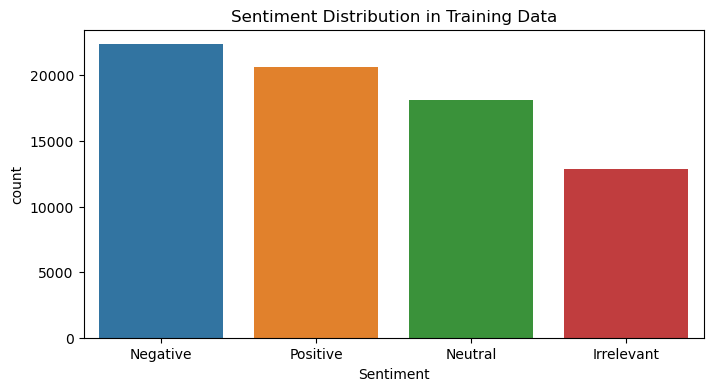

In [304]:
# Sentiment distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df_train, x='Sentiment', order=df_train['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution in Training Data")
plt.show()


From the graph, we can observe how tweets are distributed among the different sentiments. This distribution will help us in understanding any potential class imbalance, which will be important when training our sentiment analysis model.

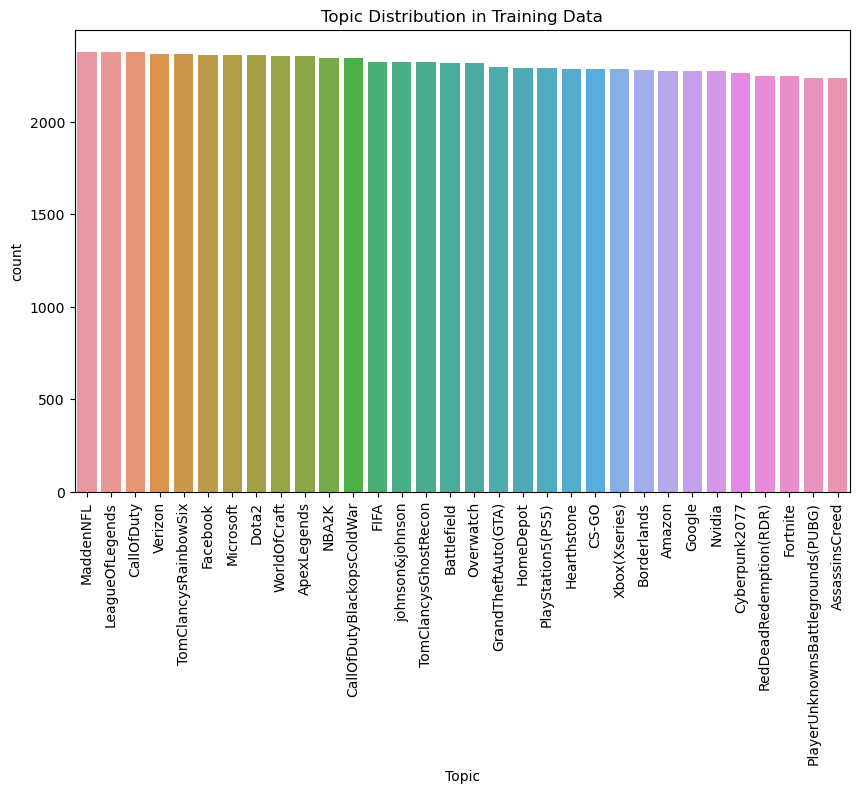

EDA complete.


In [305]:
# Topic distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Topic', order=df_train['Topic'].value_counts().index)
plt.title("Topic Distribution in Training Data")
plt.xticks(rotation=90)
plt.show()

print("EDA complete.")

This countplot helps to identify which topics are more dominant in the dataset and can alert you to potential biases or imbalances in the topics represented.

#### 5. Data Preprocessing

##### 5.1 Label Encoding the Class Label

In [306]:
# Define mapping
label_mapping = {'Neutral': 0, 'Positive': 1, 'Negative': 2, 'Irrelevant': 3}

# Apply mapping on training and validation datasets
df_train["Sentiment"] = df_train["Sentiment"].map(label_mapping)
df_val["Sentiment"] = df_val["Sentiment"].map(label_mapping)


print(df_train.head())  # Check the transformed labels

     ID        Topic  Sentiment  \
0  2401  Borderlands          1   
1  2401  Borderlands          1   
2  2401  Borderlands          1   
3  2401  Borderlands          1   
4  2401  Borderlands          1   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


#### Function to Preprocess the data

In [307]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    # Lowercase text
    text = text.lower()
    
    # Remove URLs, mentions, hashtags, and punctuation
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize, remove stopwords, and lemmatize tokens
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return " ".join(tokens)

print("Preprocessing function defined.")

Preprocessing function defined.


In [308]:
# Creating a function to retrieve tweets at an index position 
def preprocess_tweet_at_index(df, index):
    tweet = df["Tweet"].iloc[index]

# Apply the preprocessing function to clean the tweet text
    cleaned_tweet = preprocess_text(tweet)

# Return the cleaned tweet
    return cleaned_tweet

In [309]:
# Confirming preprocessing at index 100
index = 100
cleaned_tweet = preprocess_tweet_at_index(df_train, index)
print(cleaned_tweet)   # This is output at index 100

appreciate sonic concept praxis valenzuela landaposas thread together talk multimodal listening soundwalks borderland framework participatory action research testimonios many thoughtful resonant intersection


This confirms that our preprocessor function is working and all the preprocessing steps in the function have been applied to our text data

#### 6. Modelling
##### 6.1 Logistic Regression Model

We shall create a pipeline with Logistic Regression as our Baseline Model

In [328]:
# The pipeline will include our TextPreprocessor, TfidfVectorizer, and Logistic Regression model
pipeline = Pipeline([
    ('preprocess', FunctionTransformer(lambda x: [preprocess_text(text) for text in x])),
    ('vect', CountVectorizer()),     # Count vectorization
    ('tfidf', TfidfTransformer()),   # TF-IDF transformation
    ('clf', LogisticRegression(max_iter=1000))
])  

In [329]:
# Checking sample texts transformation
sample_texts = df_train['Tweet'].head(2)
transformed_texts = pipeline.named_steps['preprocess'].transform(sample_texts)
print("Sample transformed texts:")
for text in transformed_texts:
    print(text)

Sample transformed texts:
coming border kill
im getting borderland kill


In [330]:
# Split features and labels from training data
X_train = df_train['Tweet']
y_train = df_train['Sentiment']

In [331]:
# Fitting the training data to the Pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function <lambda> at 0x000001DBBD493380>)),
                ('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=1000))])

#### 6.1 Validating the Model


In [332]:
# Defining the Actual and predicted variables
test_tweets = df_val["Tweet"]
actual_sentiments = df_val["Sentiment"] # Actual Labels
predicted_sentiments = pipeline.predict(test_tweets)

In [333]:
# Creating a function to evaluate our models
def evaluate_sentiment_model(df_val, pipeline):
   
    X_val_lr = test_tweets
    y_true = actual_sentiments# Actual Labels
    y_pred_lr = predicted_sentiments # Logistic Regression predictions
    
    # Print results
    print("Classification Report:\n", classification_report(y_true, y_pred_lr))

# Evaluating our model
evaluate_sentiment_model(df_val, pipeline)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       285
           1       0.89      0.91      0.90       277
           2       0.86      0.95      0.90       266
           3       0.88      0.85      0.87       171

    accuracy                           0.90       999
   macro avg       0.90      0.89      0.89       999
weighted avg       0.90      0.90      0.90       999



In [335]:
# Getting the accuracy score of our model
accuracy_score_log_reg = accuracy_score(actual_sentiments, predicted_sentiments)
accuracy_score_log_reg
print(f"The baseline Logistic Regression Model has an accuracy score of {accuracy_score_log_reg}")

The baseline Logistic Regression Model has an accuracy score of 0.8978978978978979


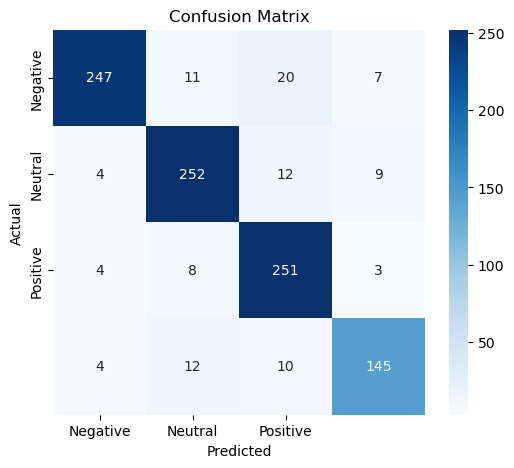

In [323]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
cm_lr = confusion_matrix(actual_sentiments, predicted_sentiments)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 7. Random Forest Model


In [325]:
# Changing the model in pipeline to Random Forest and setting the parameters
pipeline_rf = pipeline.set_params(clf=RandomForestClassifier(n_estimators=100, random_state=42))

In [326]:
# Creating a param grid for hyper-parameter tuning
param_grid_rf = {
    'clf__max_depth': [10, 20, None],  # Tree depth
    'clf__min_samples_split': [2, 5, 10],  # Min samples to split
}

In [184]:
# Creating a grid search 
grid_search = GridSearchCV(pipeline_rf, param_grid=param_grid_rf, cv=3, scoring="accuracy", n_jobs=1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        FunctionTransformer(func=<function <lambda> at 0x000001DB8EA5DB20>)),
                                       ('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'clf__max_depth': [10, 20, None],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [194]:
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)
print("\nBest Cross-Validation Score:")
print(grid_search.best_score_)


Best Hyperparameters from Grid Search:
{'clf__max_depth': None, 'clf__min_samples_split': 10}

Best Cross-Validation Score:
0.44265153050881817


In [226]:
# Getting the best model
best_model_rf = grid_search.best_estimator_
y_pred_rf = best_model_rf.predict(X_val_lr)

print("\nClassification Report on Validation Data:")
print(classification_report(y_true, y_pred_rf))


Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       285
           1       0.96      0.97      0.97       277
           2       0.97      0.98      0.98       266
           3       1.00      0.95      0.98       171

    accuracy                           0.97       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



In [206]:
acc_rf = accuracy_score(y_true, y_pred_rf)
acc_rf

0.973973973973974

In [207]:
# Validating the results
df_val_results = pd.DataFrame({
    'Tweet': df_val['Tweet'],
    'Actual_Sentiment': y_true,
    'Predicted_Sentiment': y_pred_rf 
})

# Display the first few rows to review the results
df_val_results.head(10)

,Tweet,Actual_Sentiment,Predicted_Sentiment
0,BBC News - Amazon boss Jeff Bezos rejects clai...,0,0
1,@Microsoft Why do I pay for WORD when it funct...,2,2
2,"CSGO matchmaking is so full of closet hacking,...",2,2
3,Now the President is slapping Americans in the...,0,0
4,Hi @EAHelp I’ve had Madeleine McCann in my cel...,2,2
5,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...,1,1
6,"Rocket League, Sea of Thieves or Rainbow Six: ...",1,1
7,my ass still knee-deep in Assassins Creed Odys...,1,1
8,FIX IT JESUS ! Please FIX IT ! What In the wor...,2,2
9,The professional dota 2 scene is fucking explo...,1,1


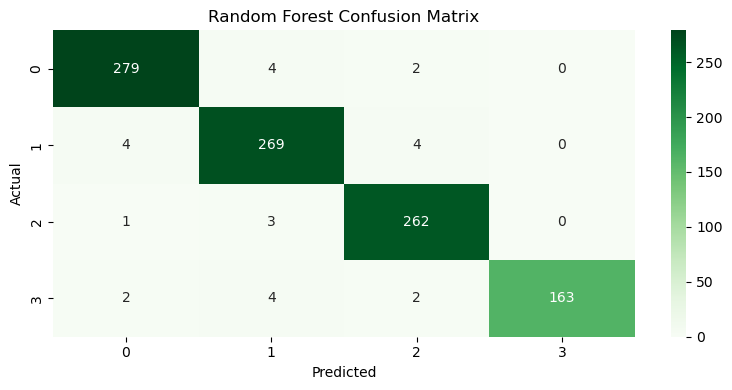

In [208]:
# Plotting confusion matrix for the Random Forest Model
cm_rf = confusion_matrix(y_true, y_pred_rf)
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(cm_rf, annot=True, fmt='d', ax=ax, cmap='Greens')
ax.set_title('Random Forest Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [227]:
# Choose best model based on accuracy
if acc_lr >= acc_rf:
    best_model = 'Logistic Regression'
    best_accuracy = acc_lr
else:
    best_model = 'Random Forest'
    best_accuracy = acc_rf

print('\
Best Model: ' + best_model + ' with Accuracy: ' + str(best_accuracy))

print('\
Conclusions:')
print('After performing EDA, preprocessing the text, and evaluating models, we conclude that ' + best_model + ' is the best with an accuracy of ' + str(round(best_accuracy, 4)) + '.')

print('done')

Best Model: Random Forest with Accuracy: 0.973973973973974
Conclusions:
After performing EDA, preprocessing the text, and evaluating models, we conclude that Random Forest is the best with an accuracy of 0.974.
done


In [228]:
def predict_sentiment(input_text, best_model):
    
    # Predict the sentiment using the best model
    prediction = best_model_rf.predict([input_text])[0]  # Get the prediction for the input text
    
    # Use an if-else structure to assign labels
    if prediction == 0:
        return 'Neutral'  # Sentiment is Neutral
    elif prediction == 1:
        return 'Positive'  # Sentiment is Positive
    elif prediction == 2:
        return 'Negative'  # Sentiment is Negative
    elif prediction == 3:
        return 'Irrelevant'  # Sentiment is Irrelevant
    else:
        return 'Unknown'  # In case there's an unexpected label

In [235]:
input_text = df_val["Tweet"].iloc[5]
sentiment = predict_sentiment(input_text, best_model)




'Positive'

In [ ]:
# Ask the user for the index they want to predict
index = int(input("Enter the index for the Tweet (e.g., 5): "))

# Retrieve the text from df_val using the entered index
input_text = df_val["Tweet"].iloc[index]

# Predict the sentiment using the best model
sentiment = predict_sentiment(input_text, best_model)

# Display the result
print(f"Predicted sentiment: {sentiment}")



KeyboardInterrupt: Interrupted by user